Project Description


Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/dsrscientist/dataset4
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv



# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


We observe that in this data set numerical as well as categorical data is present

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
215,CS-97216,A-,B+,A,A,A-,A-,A,B+,C+,...,C-,B-,C-,C,A-,B,C,C+,A-,3.075
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
154,CS-97155,A-,A-,A-,B-,B,A-,B-,A-,B+,...,D+,C,D+,C+,B+,A,C-,B-,B,2.603
517,CS-97518,B+,C-,A,A-,A,A,A,B+,A,...,A,C,A,B+,B,B-,B+,B-,B,3.272
255,CS-97256,C-,D,D+,C,D,A-,D,D,C,...,D,C-,C,C-,D+,C+,B-,C-,B-,1.764
550,CS-97551,B-,B,A,C,A,A-,D+,A-,D,...,A,C,B+,B-,C,D+,C,F,F,2.359
333,CS-97334,B,C,B-,C+,A-,C,B+,B+,B,...,A-,C+,D+,C+,A-,A-,B,A-,NaN,2.619
347,CS-97348,B,B,A,B+,A,A,B+,A,A-,...,A+,B+,A-,A-,A,A,B,A,NaN,3.689
471,CS-97472,B+,C,A,A,A-,A-,B-,B+,A-,...,A,B+,A,B,B,B,A-,B+,B+,3.339
30,CS-97031,A-,B,A,B+,B-,A-,B+,A,A-,...,C,A-,A-,B-,A-,A,B+,B+,A,3.443


In [5]:
#checking the null value of  column of dataset
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

we observe that there is null value is present in  columns

In [6]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 425


<Axes: >

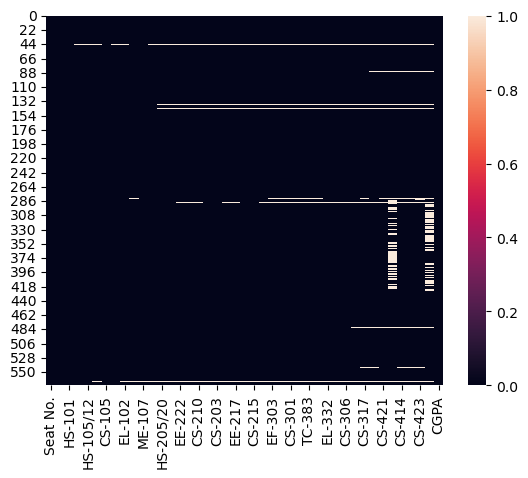

In [7]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe by heat map that there is  null value  present in many columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

out of 571 row we observe that there is  null value present in many column,and all datatypes seem to object and float

In [9]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# Exploratory Data Analysis(EDA)

In [10]:
#checking the shape of dataset
df.shape

(571, 43)

we observe that there 571 row and 43 columns is present in this dataset

In [11]:
#checking the column of dataset
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

there are 43 no of column is present out of which CGPA our target 

In [12]:
# to convert index from row to columnWorld Happiness Report Project
df.columns.tolist()


['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [13]:
#checking the types of column of dataset
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

We observe there are both type object and float datatype are present

In [14]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


mostly all column have unique value in all row  ehere only 14 unique value present

In [15]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

These are the value counts of all columns and we have seen there is  white space are present

In [16]:
#checking the list of counts of target
df["CGPA"].unique()

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.418, 2.564, 2.468, 3.769,
       2.999, 2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458,
       2.34 , 3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171,
       3.761, 2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084,
       1.38 , 1.89 , 3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396,
       3.772, 1.768, 3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 2.3  ,
       3.759, 3.516, 2.087, 3.137, 2.011, 2.566, 1.993, 3.334, 2.056,
       2.552, 2.028, 2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 , 2.208,
       2.698, 2.823,

appox all are unique value

In [17]:
df["CGPA"].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

there are 491 Unique value are present

In [18]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


Numerical columns: ['CGPA']


There are 42 categorical column and one numerical column

# Description of data set

In [19]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


This gives the all statical information of the numerical columns.There is no negative or invalid value is present
hence we can say that it is perfect we can observe these points: 

    1.The counts of all columns are same it means there is no missing value in any column
    
    2.The mean value and median(50%) in all columns are apoximately equal it meance this data set
    
    is normaly distributed columns which means the data is not skewed  in these columns 
    
    3.There no any columns in which mean value is less than median(50%) hence there no right skewed 
    
    4.There is no major difference beteen 75% and max   it means the no are present in this columns
    
    5.In this discription min,std and 25% detail also found

# Encoding columns value

In [20]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Seat No.']=le.fit_transform(df['Seat No.'])
df['Seat No.']


0        0
1        1
2        2
3        3
4        4
      ... 
566    566
567    567
568    568
569    569
570    570
Name: Seat No., Length: 571, dtype: int32

In [21]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,1,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,2,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,3,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,4,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,567,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,568,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,569,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [22]:
df['HS-101']=le.fit_transform(df['HS-101'])
df['HS-101']

0      10
1       9
2       3
3       7
4       2
       ..
566     0
567     0
568     0
569     4
570     9
Name: HS-101, Length: 571, dtype: int32

In [23]:
df['PH-121']=le.fit_transform(df['PH-121'])
df['PH-121']

0      5
1      0
2      0
3      9
4      2
      ..
566    3
567    1
568    3
569    0
570    6
Name: PH-121, Length: 571, dtype: int32

In [24]:
df['CY-105']=le.fit_transform(df['CY-105'])
df['CY-105']

0       8
1      10
2       0
3      10
4       2
       ..
566     0
567     0
568     2
569     9
570     9
Name: CY-105, Length: 571, dtype: int32

In [25]:
df['HS-105/12']=le.fit_transform(df['HS-105/12'])
df['HS-105/12']

0      6
1      9
2      5
3      9
4      4
      ..
566    2
567    0
568    4
569    0
570    6
Name: HS-105/12, Length: 571, dtype: int32

In [26]:
df['MT-111']=le.fit_transform(df['MT-111'])
df['MT-111']

0      8
1      5
2      4
3      9
4      0
      ..
566    1
567    0
568    0
569    9
570    6
Name: MT-111, Length: 571, dtype: int32

In [27]:
df['CS-105']=le.fit_transform(df['CS-105'])
df['CS-105']


0      10
1       6
2       0
3       2
4       0
       ..
566     0
567     0
568     0
569    10
570    10
Name: CS-105, Length: 571, dtype: int32

In [28]:
df['CS-106']=le.fit_transform(df['CS-106'])
df['CS-106']

0       9
1       9
2       5
3      10
4       2
       ..
566     2
567     0
568     0
569     5
570     3
Name: CS-106, Length: 571, dtype: int32

In [29]:
df['EL-102']=le.fit_transform(df['EL-102'])
df['EL-102']

0      8
1      0
2      4
3      8
4      4
      ..
566    2
567    2
568    0
569    8
570    7
Name: EL-102, Length: 571, dtype: int32

In [30]:
df['EE-119']=le.fit_transform(df['EE-119'])
df['EE-119']

0       5
1      10
2       2
3       9
4       0
       ..
566     1
567     0
568     0
569     5
570     6
Name: EE-119, Length: 571, dtype: int32

In [31]:
df['CS-105']=le.fit_transform(df['CS-105'])
df['CS-105']

0      10
1       6
2       0
3       2
4       0
       ..
566     0
567     0
568     0
569    10
570    10
Name: CS-105, Length: 571, dtype: int64

In [32]:
df['ME-107']=le.fit_transform(df['ME-107'])
df['ME-107']

0       8
1       9
2       2
3       7
4       2
       ..
566     4
567     0
568     3
569     8
570    10
Name: ME-107, Length: 571, dtype: int32

In [33]:
df['CS-107']=le.fit_transform(df['CS-107'])
df['CS-107']

0      8
1      4
2      5
3      9
4      6
      ..
566    1
567    1
568    1
569    1
570    5
Name: CS-107, Length: 571, dtype: int32

In [34]:
df['HS-205/20']=le.fit_transform(df['HS-205/20'])
df['HS-205/20']

0      4
1      7
2      2
3      3
4      0
      ..
566    0
567    4
568    5
569    7
570    7
Name: HS-205/20, Length: 571, dtype: int32

In [35]:
df['EE-222']=le.fit_transform(df['EE-222'])
df['EE-222']

0      2
1      8
2      0
3      5
4      2
      ..
566    0
567    2
568    4
569    9
570    4
Name: EE-222, Length: 571, dtype: int32

In [36]:
df['MT-222']=le.fit_transform(df['MT-222'])
df['MT-222']

0       9
1       5
2       0
3      10
4       0
       ..
566     1
567     7
568     3
569     9
570     8
Name: MT-222, Length: 571, dtype: int32

In [37]:
df['MT-224']=le.fit_transform(df['MT-224'])
df['MT-224']

0       5
1      10
2       0
3       9
4       2
       ..
566     0
567     3
568     3
569     3
570    10
Name: MT-224, Length: 571, dtype: int32

In [38]:
df['CS-210']=le.fit_transform(df['CS-210'])
df['CS-210']

0       7
1      10
2       0
3       6
4       2
       ..
566     0
567     0
568     2
569     5
570     4
Name: CS-210, Length: 571, dtype: int32

In [39]:
df['CS-211']=le.fit_transform(df['CS-211'])
df['CS-211']

0      10
1       9
2       1
3       4
4       5
       ..
566     0
567     0
568     0
569     3
570     8
Name: CS-211, Length: 571, dtype: int32

In [40]:
df['CS-203']=le.fit_transform(df['CS-203'])
df['CS-203']

0      10
1       6
2       0
3       7
4       0
       ..
566     1
567     1
568     4
569     5
570     3
Name: CS-203, Length: 571, dtype: int32

In [41]:
df['CS-214']=le.fit_transform(df['CS-214'])
df['CS-214']

0       9
1       9
2       2
3       9
4       2
       ..
566     0
567     1
568     3
569     6
570    10
Name: CS-214, Length: 571, dtype: int32

In [42]:
df['CS-212']=le.fit_transform(df['CS-212'])
df['CS-212']

0       9
1       6
2       2
3       9
4       2
       ..
566     3
567     0
568     4
569    10
570     6
Name: CS-212, Length: 571, dtype: int32

In [43]:
df['EE-217']=le.fit_transform(df['EE-217'])
df['EE-217']

0       0
1       5
2       0
3      10
4       0
       ..
566     0
567     0
568     0
569     5
570     8
Name: EE-217, Length: 571, dtype: int32

In [44]:
df['CS-215']=le.fit_transform(df['CS-215'])
df['CS-215']

0       8
1       9
2       0
3       9
4       2
       ..
566     2
567     3
568     3
569    10
570    10
Name: CS-215, Length: 571, dtype: int32

In [45]:
df['MT-331']=le.fit_transform(df['MT-331'])
df['MT-331']

0       6
1      10
2       0
3      10
4       7
       ..
566     0
567     0
568     0
569     7
570     6
Name: MT-331, Length: 571, dtype: int32

In [46]:
df['EF-303']=le.fit_transform(df['EF-303'])
df['EF-303']

0      7
1      8
2      6
3      8
4      7
      ..
566    2
567    0
568    2
569    8
570    8
Name: EF-303, Length: 571, dtype: int32

In [47]:
df['HS-304']=le.fit_transform(df['HS-304'])
df['HS-304']

0       7
1       8
2       0
3       5
4       2
       ..
566     2
567     0
568     5
569     6
570    11
Name: HS-304, Length: 571, dtype: int32

In [48]:
df['CS-301']=le.fit_transform(df['CS-301'])
df['CS-301']

0      3
1      2
2      4
3      9
4      5
      ..
566    2
567    0
568    4
569    6
570    9
Name: CS-301, Length: 571, dtype: int32

In [49]:
df['CS-302']=le.fit_transform(df['CS-302'])
df['CS-302']

0       6
1      10
2       2
3       5
4       2
       ..
566     0
567     0
568     4
569     7
570     9
Name: CS-302, Length: 571, dtype: int32

In [50]:
df['TC-383']=le.fit_transform(df['TC-383'])
df['TC-383']

0       7
1       8
2       3
3      10
4       7
       ..
566     1
567     0
568     0
569     8
570     6
Name: TC-383, Length: 571, dtype: int32

In [51]:
df['MT-442']=le.fit_transform(df['MT-442'])
df['MT-442']

0      4
1      8
2      0
3      8
4      2
      ..
566    1
567    1
568    4
569    8
570    2
Name: MT-442, Length: 571, dtype: int32

In [52]:
df['EL-332']=le.fit_transform(df['EL-332'])
df['EL-332']

0       6
1       6
2       4
3      10
4       2
       ..
566     0
567     0
568     3
569     9
570    11
Name: EL-332, Length: 571, dtype: int32

In [53]:
df['CS-318']=le.fit_transform(df['CS-318'])
df['CS-318']

0      8
1      2
2      2
3      4
4      5
      ..
566    0
567    1
568    7
569    5
570    8
Name: CS-318, Length: 571, dtype: int32

In [54]:
df['CS-306']=le.fit_transform(df['CS-306'])
df['CS-306']

0       6
1       9
2       2
3       8
4       2
       ..
566     4
567     2
568     4
569     4
570    10
Name: CS-306, Length: 571, dtype: int32

In [55]:
df['CS-312']=le.fit_transform(df['CS-312'])
df['CS-312']

0       8
1      10
2       3
3      10
4       5
       ..
566     2
567     4
568     2
569     9
570     7
Name: CS-312, Length: 571, dtype: int32

In [56]:
df['CS-317']=le.fit_transform(df['CS-317'])
df['CS-317']

0      8
1      9
2      3
3      6
4      4
      ..
566    2
567    4
568    3
569    3
570    6
Name: CS-317, Length: 571, dtype: int32

In [57]:
df['CS-403']=le.fit_transform(df['CS-403'])
df['CS-403']

0       8
1       6
2       0
3      10
4       4
       ..
566     0
567     0
568     0
569     3
570     5
Name: CS-403, Length: 571, dtype: int32

In [58]:
df['CS-421']=le.fit_transform(df['CS-421'])
df['CS-421']

0      8
1      9
2      6
3      8
4      5
      ..
566    0
567    0
568    4
569    8
570    9
Name: CS-421, Length: 571, dtype: int32

In [59]:
df['CS-406']=le.fit_transform(df['CS-406'])
df['CS-406']

0       2
1       2
2       0
3       5
4       2
       ..
566     0
567     2
568     0
569     9
570    11
Name: CS-406, Length: 571, dtype: int32

In [60]:
df['CS-414']=le.fit_transform(df['CS-414'])
df['CS-414']

0      0
1      5
2      0
3      3
4      0
      ..
566    4
567    3
568    6
569    6
570    8
Name: CS-414, Length: 571, dtype: int32

In [61]:
df['CS-419']=le.fit_transform(df['CS-419'])
df['CS-419']

0      8
1      6
2      0
3      7
4      2
      ..
566    4
567    2
568    4
569    3
570    4
Name: CS-419, Length: 571, dtype: int32

In [62]:
df['CS-423']=le.fit_transform(df['CS-423'])
df['CS-423']

0      3
1      6
2      2
3      7
4      2
      ..
566    3
567    6
568    2
569    5
570    9
Name: CS-423, Length: 571, dtype: int32

In [63]:
df['CS-412']=le.fit_transform(df['CS-412'])
df['CS-412']

0      2
1      3
2      0
3      7
4      0
      ..
566    0
567    2
568    2
569    6
570    8
Name: CS-412, Length: 571, dtype: int32

In [64]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: []


Numerical columns: ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA']


we observe that all column is converted into numerical column

In [65]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [66]:
#checking the null value of  column of dataset
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<Axes: >

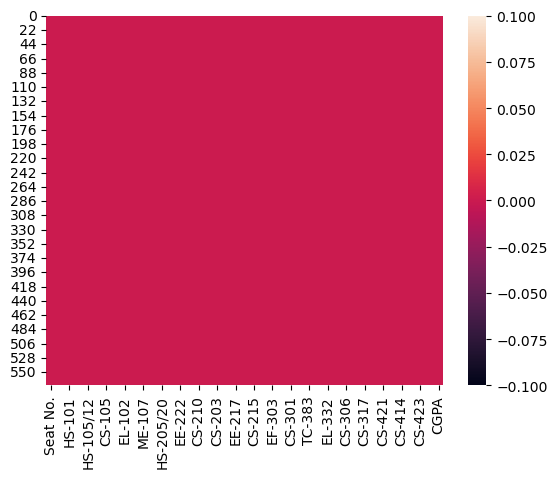

In [67]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

In [68]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


# checking skewness

In [69]:
#checking skewness
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.105583
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
CGPA        -0.497203
dtype: float64

In [70]:
df.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.921191,4.264448,3.935201,2.838879,4.161121,3.998249,3.921191,...,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,164.977776,3.046895,2.785317,2.992228,3.216478,3.034481,2.696709,2.774311,3.075939,2.698100,...,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,427.500000,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,570.000000,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


This gives the all statical information of the numerical columns.There is no negative or invalid value is present
hence we can say that it is perfect we can observe these points: 

    1.The counts of all columns are same it means there is no missing value in any column
    
    2.The mean value and median(50%) in all columns are apoximately equal it meance this data set
    
    is normaly distributed columns which means the data is not skewed  in these columns 
    
    3.There no any columns in which mean value is less than median(50%) hence there no right skewed 
    
    4.There is no major difference beteen 75% and max   it means the no are present in this columns
    
    5.In this discription min,std and 25% detail also found

# univariate analysis

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64


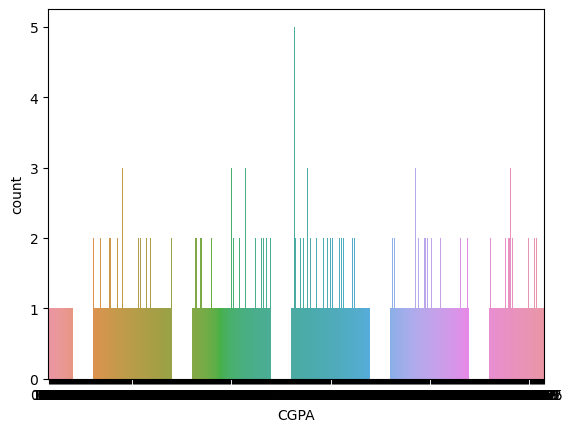

In [71]:
#visualizing the no of CGPA
ax=sns.countplot(x='CGPA',data=df)
print(df['CGPA'].value_counts())

# Check correlation

In [72]:
correlations = df.corr()['CGPA'].sort_values(ascending=False)
print(correlations)

CGPA         1.000000
Seat No.     0.054342
CS-406      -0.280626
CS-412      -0.470128
HS-205/20   -0.500668
CS-414      -0.512836
HS-101      -0.537170
CS-312      -0.562341
CS-106      -0.563178
EF-303      -0.589066
MT-331      -0.610787
CS-105      -0.613169
CS-423      -0.624558
HS-105/12   -0.627644
EE-222      -0.644384
CS-107      -0.650531
MT-442      -0.656557
HS-304      -0.656729
CS-403      -0.657128
CS-318      -0.660106
PH-121      -0.663135
EE-119      -0.668787
EL-102      -0.669536
CS-211      -0.669814
CY-105      -0.670190
ME-107      -0.677342
TC-383      -0.682447
CS-203      -0.682817
CS-212      -0.686163
MT-222      -0.695418
EE-217      -0.703131
CS-419      -0.732899
CS-421      -0.742041
MT-224      -0.743577
CS-301      -0.747775
MT-111      -0.756109
CS-214      -0.758407
CS-215      -0.768707
CS-302      -0.770868
CS-306      -0.783624
CS-210      -0.798841
CS-317      -0.800771
EL-332      -0.803475
Name: CGPA, dtype: float64


<Axes: >

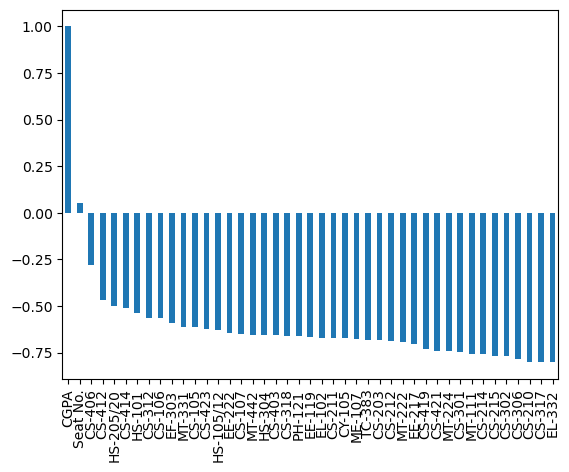

In [73]:
correlations.plot(kind='bar')

From this barplot we can observe, some obvious feature correlations such as residual sugar,free sulfur dioxide and pH are less correlated this barplot show value between +0.75 to  -1

<Axes: >

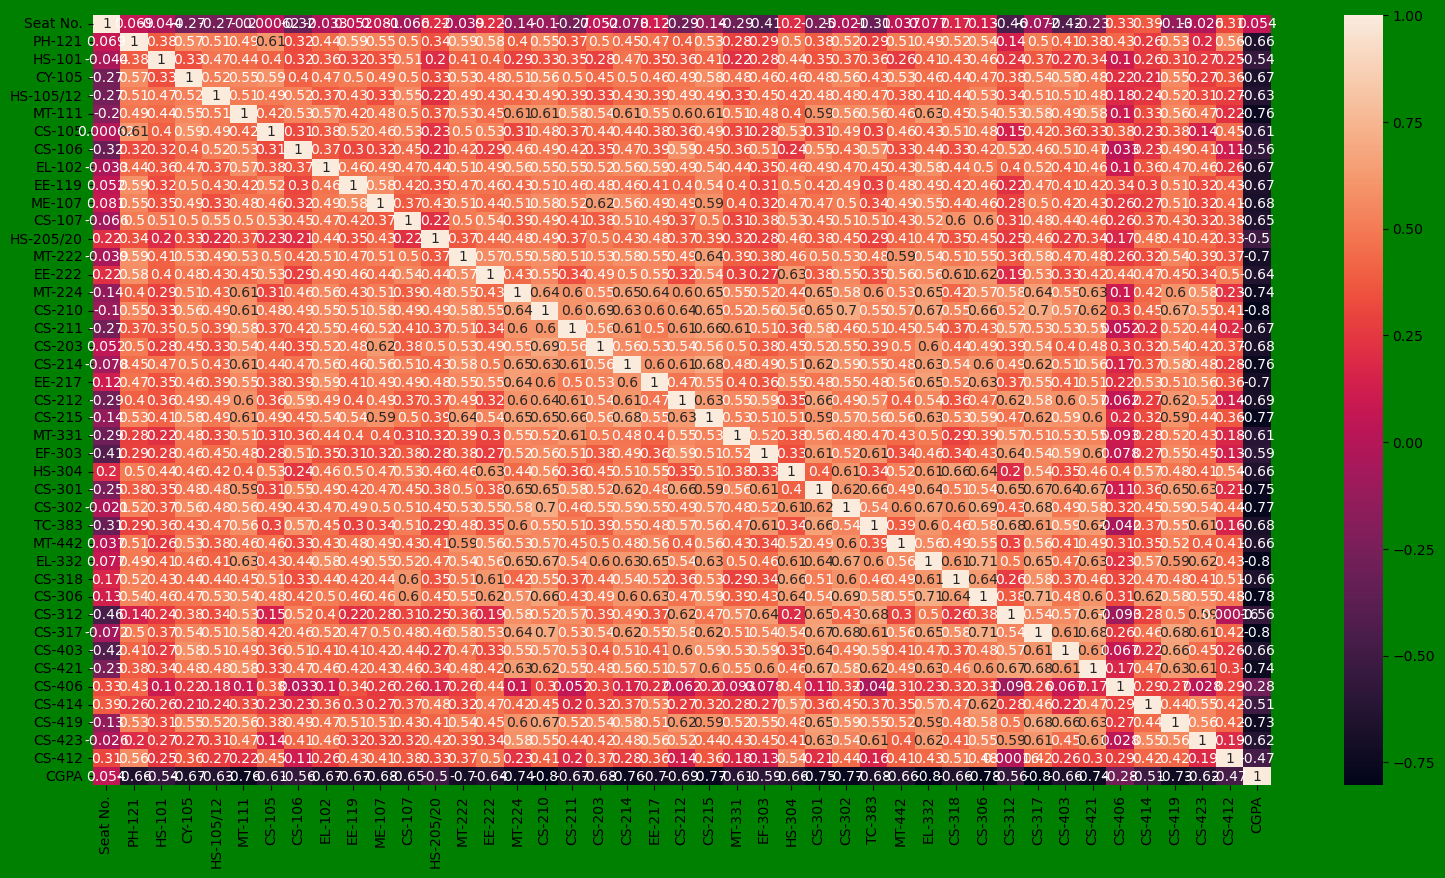

In [74]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

From this heatmap we can observe, some obvious feature correlations such as economy,family,Health and freedom is more correlated with happiness score,We can also observe that approximately half of these features correlate positively with 
happiness score and the other some are like happiness rank and other are negatively correlated,all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant
and not provide information at all.

In [75]:
print(abs(correlations) > 0.2)

CGPA          True
Seat No.     False
CS-406        True
CS-412        True
HS-205/20     True
CS-414        True
HS-101        True
CS-312        True
CS-106        True
EF-303        True
MT-331        True
CS-105        True
CS-423        True
HS-105/12     True
EE-222        True
CS-107        True
MT-442        True
HS-304        True
CS-403        True
CS-318        True
PH-121        True
EE-119        True
EL-102        True
CS-211        True
CY-105        True
ME-107        True
TC-383        True
CS-203        True
CS-212        True
MT-222        True
EE-217        True
CS-419        True
CS-421        True
MT-224        True
CS-301        True
MT-111        True
CS-214        True
CS-215        True
CS-302        True
CS-306        True
CS-210        True
CS-317        True
EL-332        True
Name: CGPA, dtype: bool


From all the values, we are selecting Economy (GDP per Capita), Family, Health (Life Expectancy),Freedom,and 
trust (Government Corruption)in order to study them better and see the distribution of values that separate
the different qualities these are positively effect happiness score

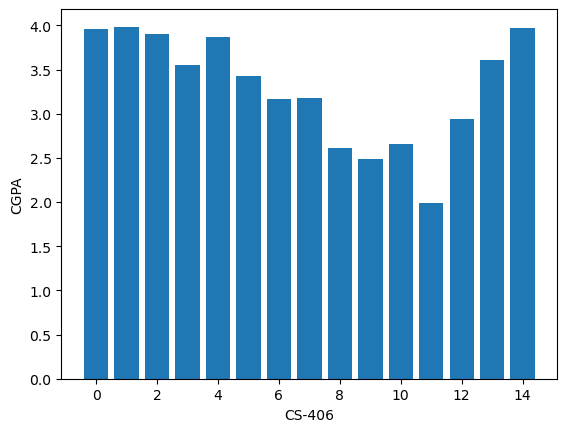

In [76]:
plt.bar(df['CS-406'], df['CGPA'])
plt.xlabel('CS-406')
plt.ylabel('CGPA')
plt.show()

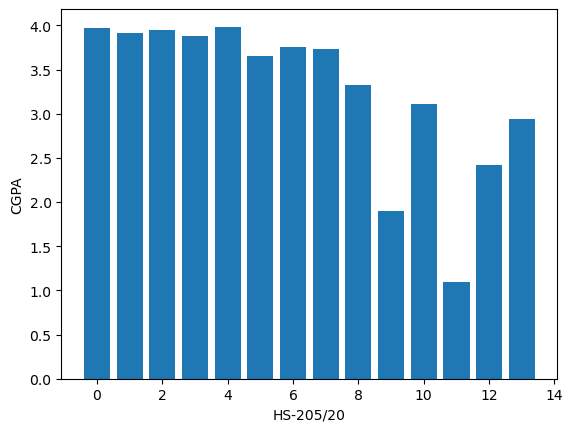

In [77]:
plt.bar(df['HS-205/20'], df['CGPA'])
plt.xlabel('HS-205/20')
plt.ylabel('CGPA')
plt.show()

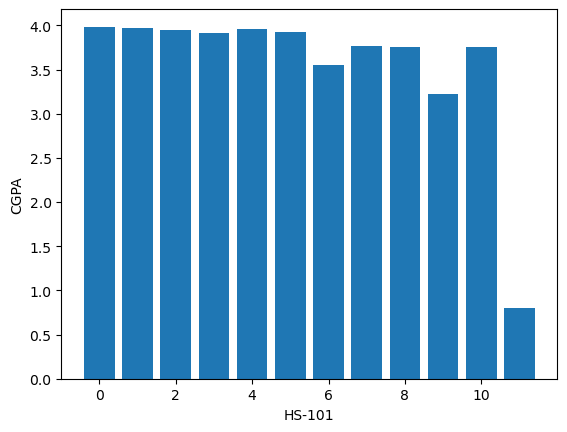

In [78]:
plt.bar(df['HS-101'], df['CGPA'])
plt.xlabel('HS-101')
plt.ylabel('CGPA')
plt.show()

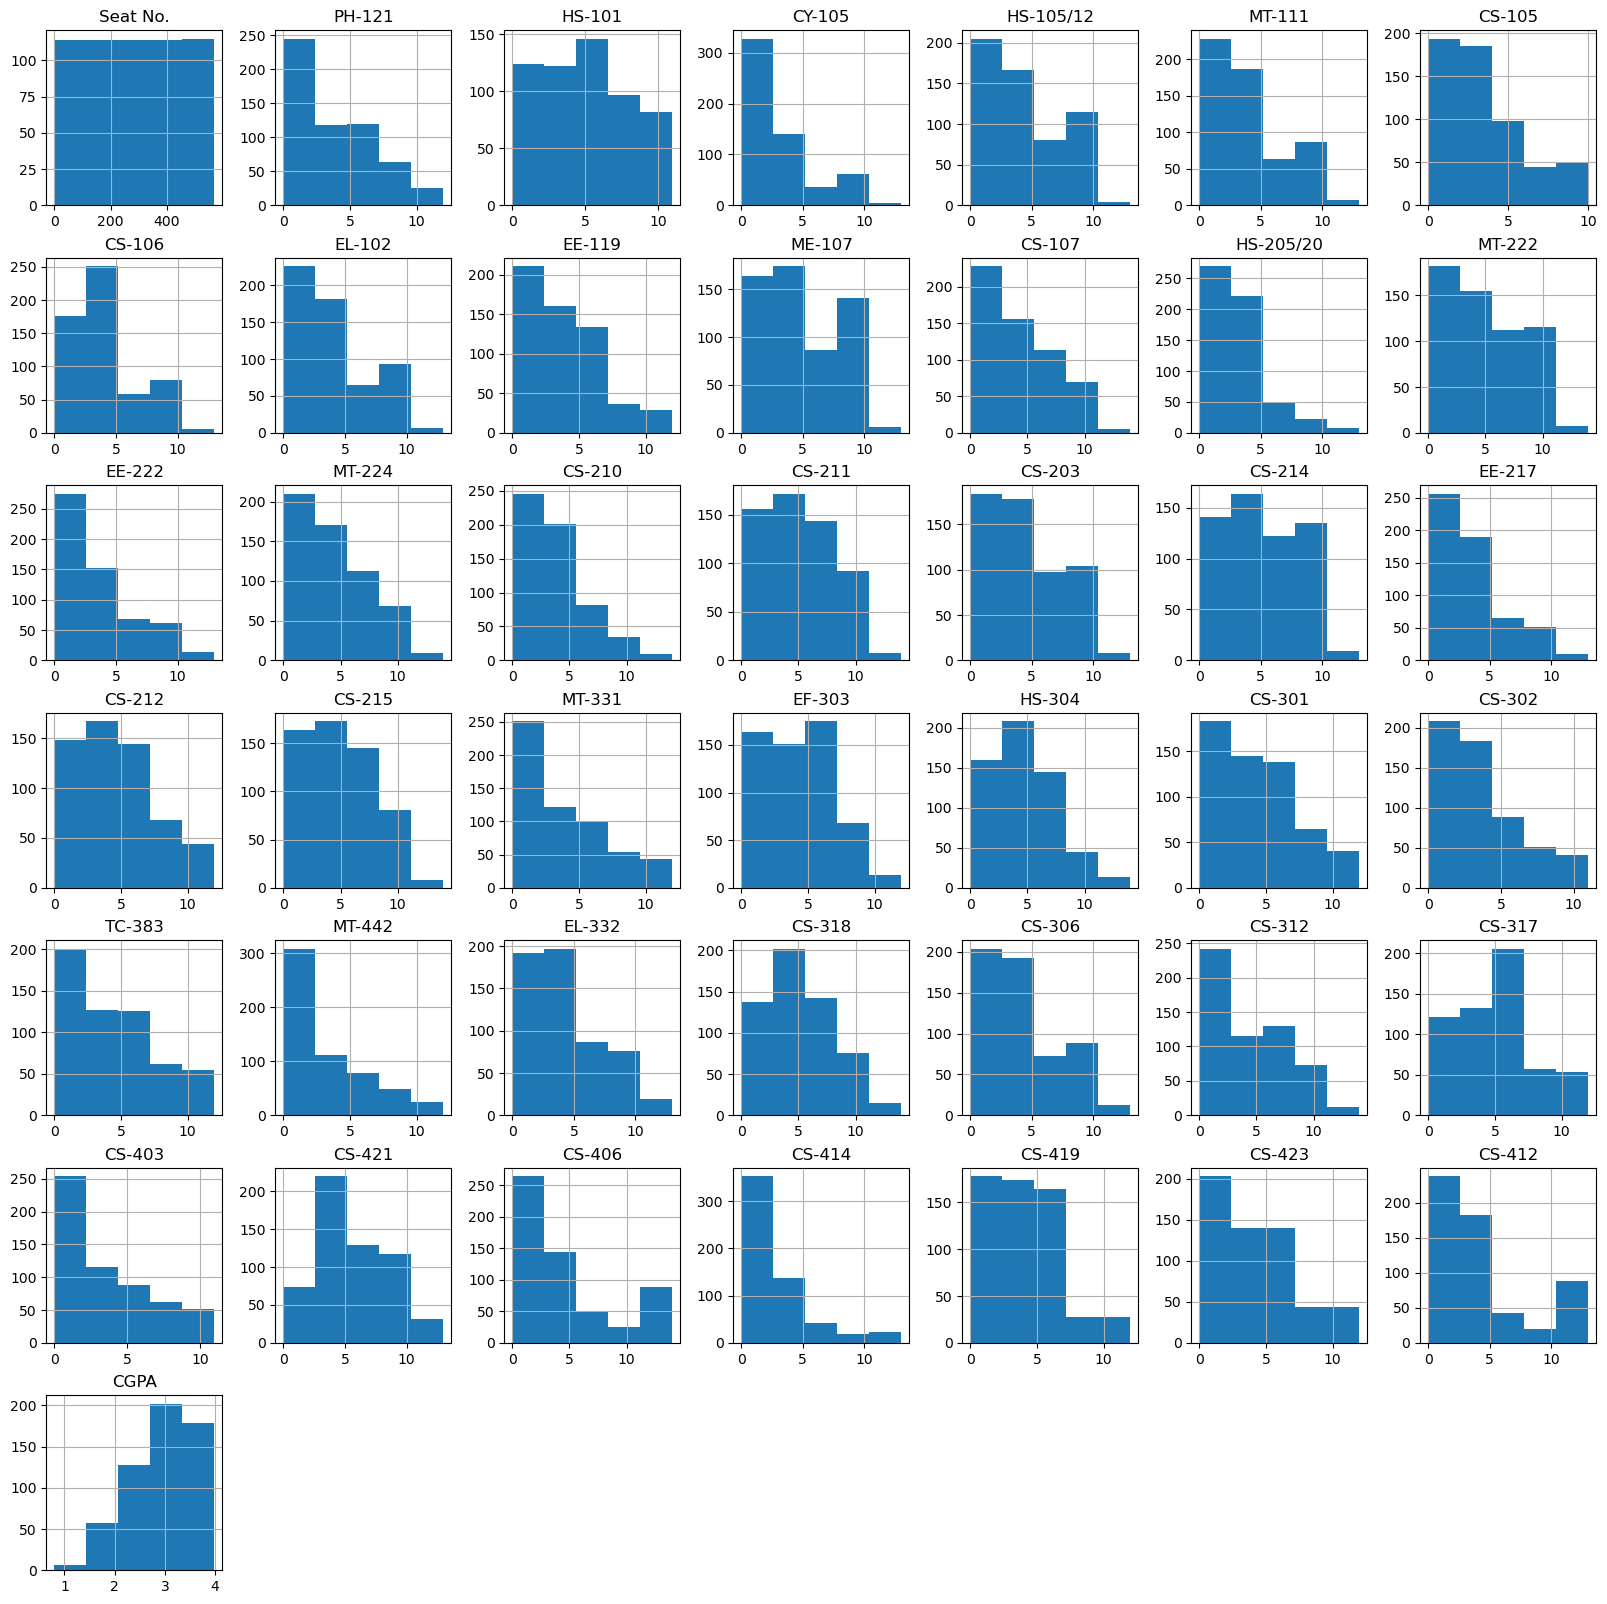

In [79]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

we observe that all features are right skewness 

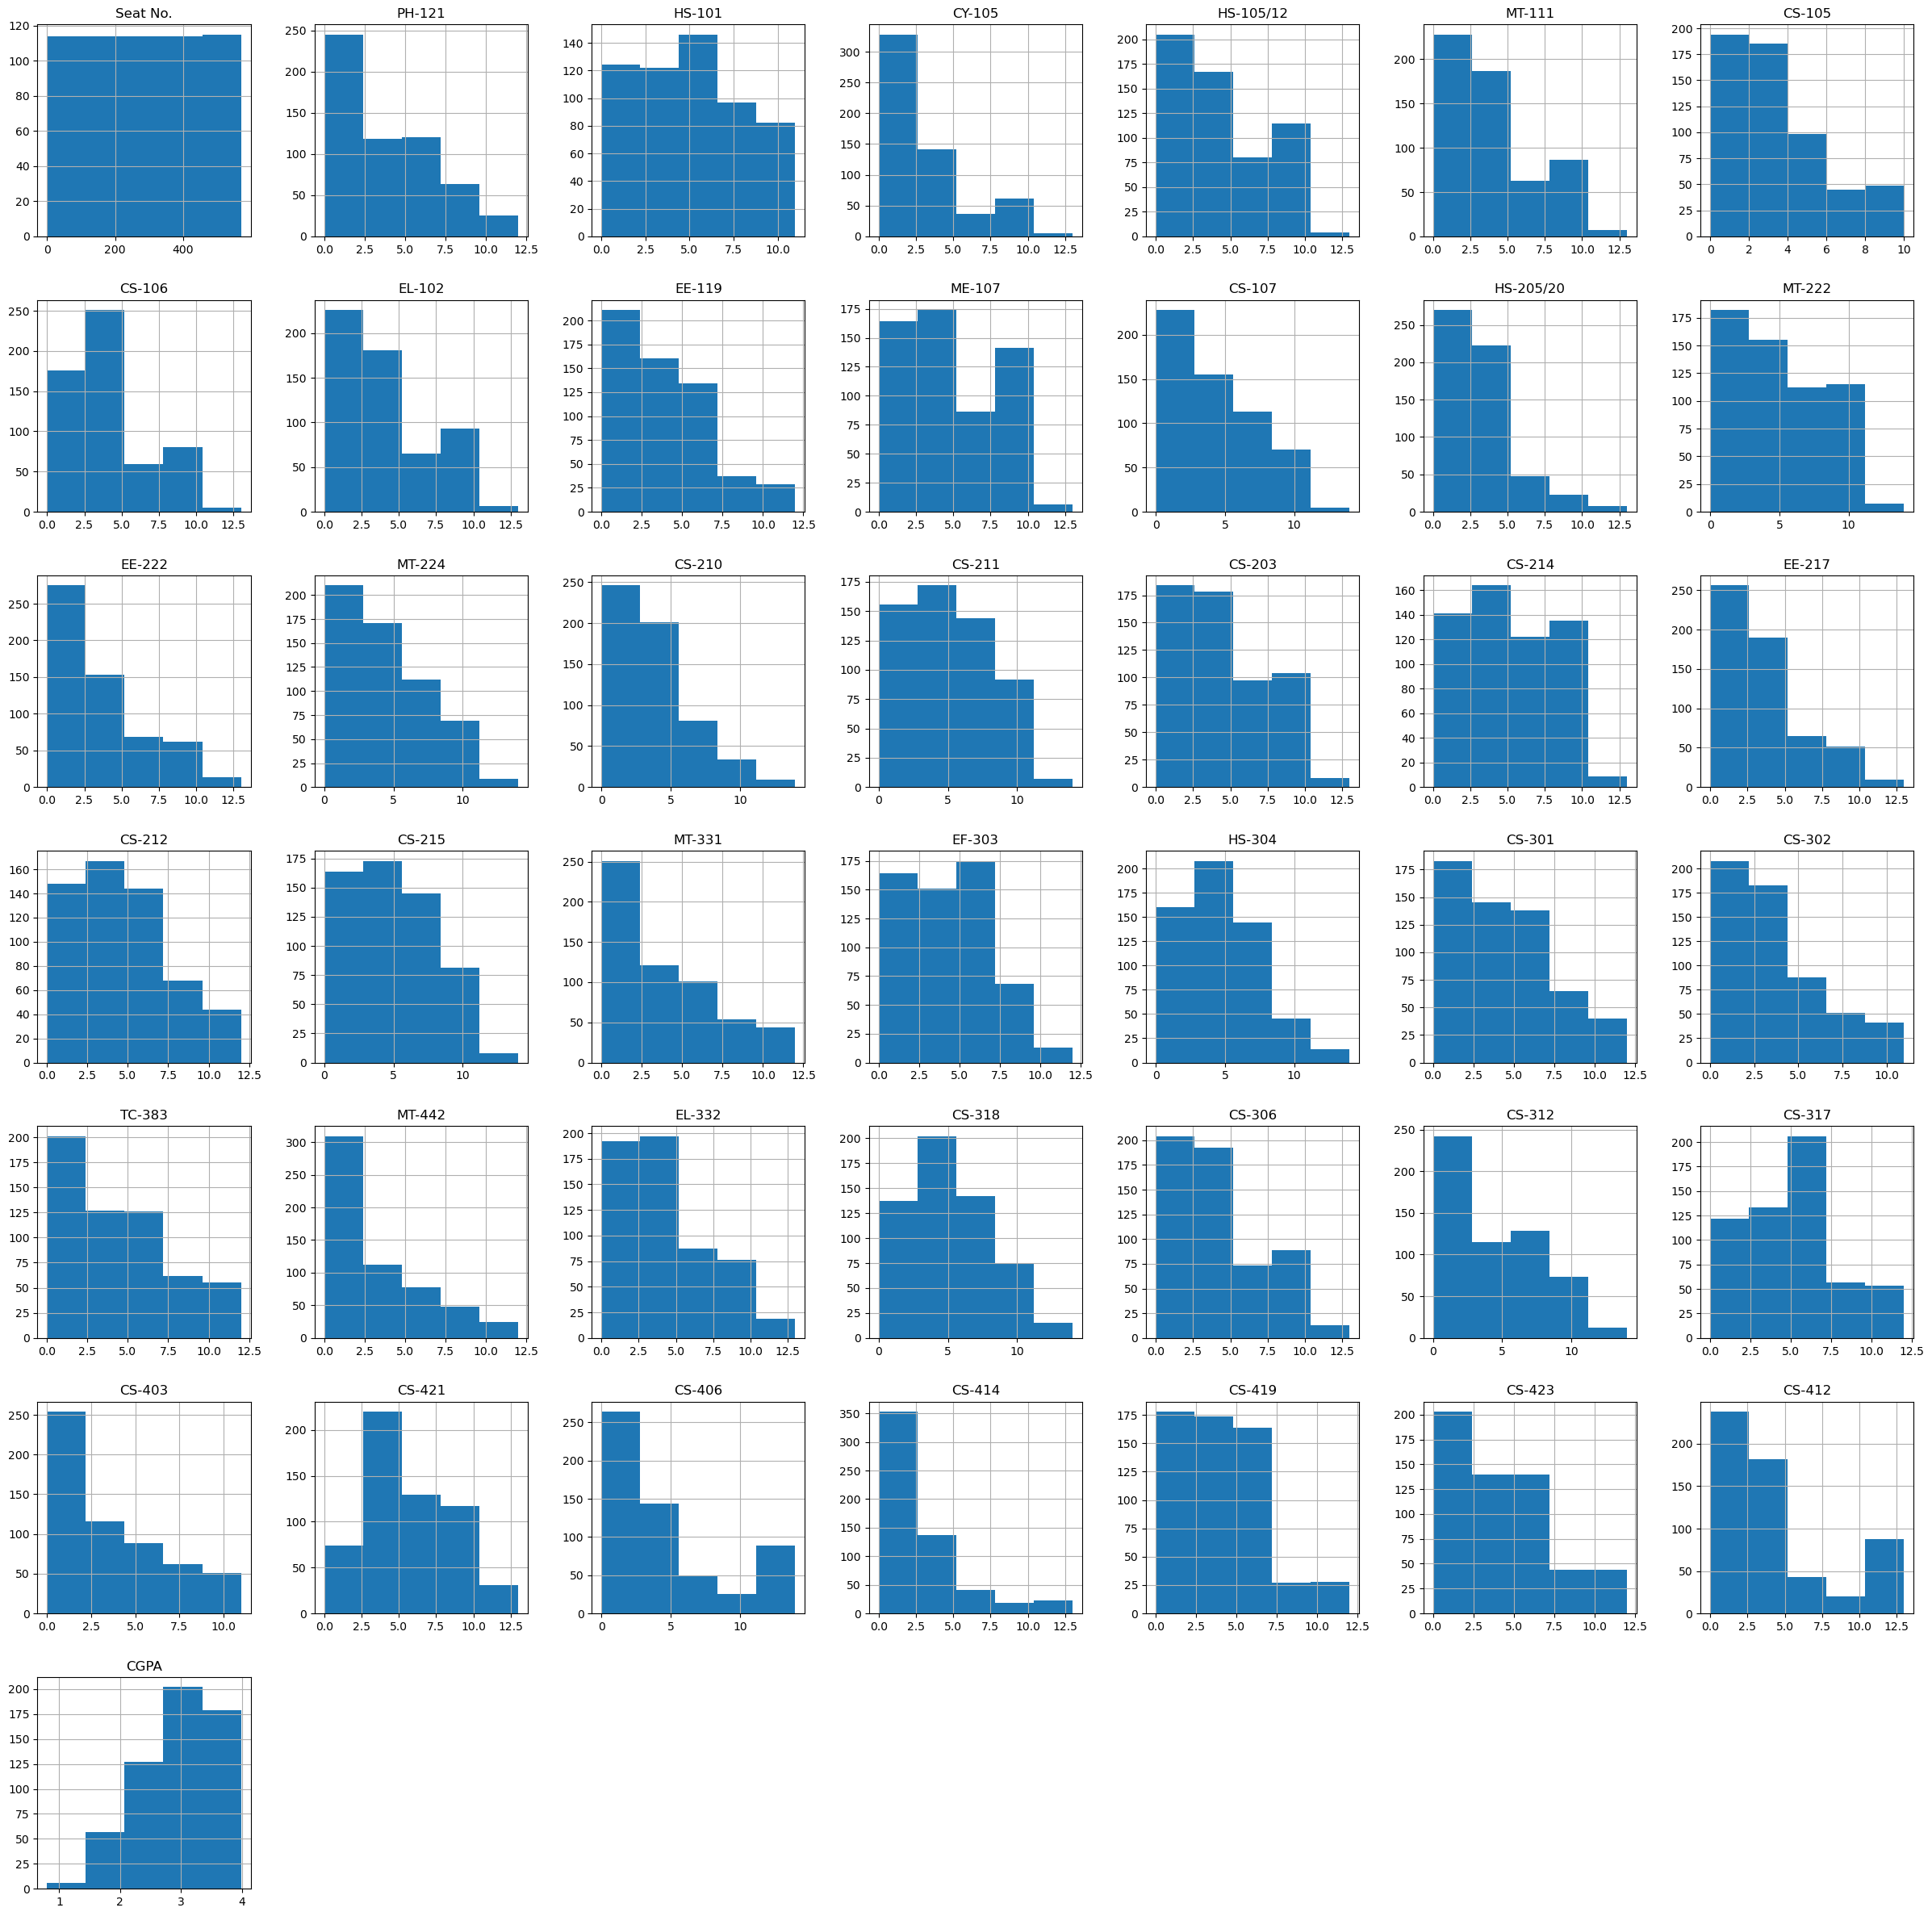

In [80]:
df.hist(bins=5, figsize=(30, 30))
plt.show()

we observe now all features are normaly distributed

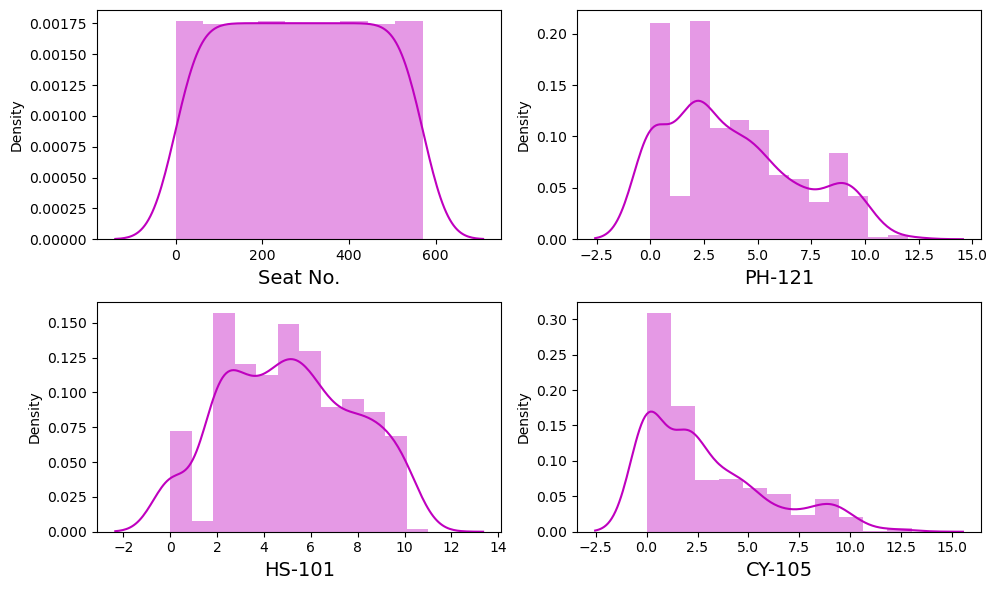

In [81]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

In [82]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


we observe now all features are not normaly distributed

In [83]:
#checking skewness
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.105583
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
CGPA        -0.497203
dtype: float64

In [84]:
df['CS-105']=np.cbrt(df['CS-105'])

In [85]:
df['CY-105']=np.cbrt(df['CY-105'])

In [86]:
df['HS-205/20']=np.cbrt(df['HS-205/20'])

In [87]:
df['EE-222']=np.cbrt(df['EE-222'])

In [88]:
df['CS-210']=np.cbrt(df['CS-210'])

In [89]:
df['EE-217']=np.cbrt(df['EE-217'])

In [90]:
df['MT-442']=np.cbrt(df['MT-442'])

In [91]:
df['CS-406']=np.cbrt(df['CS-406'])

In [92]:
df['CS-414']=np.cbrt(df['CS-414'])

In [93]:
df['CS-412']=np.cbrt(df['CS-412'])

In [94]:
#checking skewness
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105      -0.397919
HS-105/12    0.337649
MT-111       0.520916
CS-105      -0.580120
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20   -0.958609
MT-222       0.267531
EE-222      -0.758793
MT-224       0.566537
CS-210      -1.007260
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217      -1.018303
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442      -0.672029
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406      -0.671251
CS-414      -0.382579
CS-419       0.773674
CS-423       0.627219
CS-412      -0.841460
CGPA        -0.497203
dtype: float64

# visualising correlation with target to other value

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [96]:
correlations = df.corr()['CGPA'].sort_values(ascending=False)
print(correlations)

CGPA         1.000000
Seat No.     0.054342
CS-406      -0.370076
HS-205/20   -0.417144
CS-414      -0.452560
CS-105      -0.514265
CS-412      -0.521498
HS-101      -0.537170
MT-442      -0.538141
EE-222      -0.556749
CS-312      -0.562341
CS-106      -0.563178
CY-105      -0.582870
EF-303      -0.589066
EE-217      -0.600126
MT-331      -0.610787
CS-423      -0.624558
HS-105/12   -0.627644
CS-107      -0.650531
HS-304      -0.656729
CS-403      -0.657128
CS-318      -0.660106
PH-121      -0.663135
EE-119      -0.668787
EL-102      -0.669536
CS-211      -0.669814
ME-107      -0.677342
TC-383      -0.682447
CS-203      -0.682817
CS-212      -0.686163
MT-222      -0.695418
CS-210      -0.714237
CS-419      -0.732899
CS-421      -0.742041
MT-224      -0.743577
CS-301      -0.747775
MT-111      -0.756109
CS-214      -0.758407
CS-215      -0.768707
CS-302      -0.770868
CS-306      -0.783624
CS-317      -0.800771
EL-332      -0.803475
Name: CGPA, dtype: float64


In [97]:
cor=df.corr()
cor

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,0.068592,-0.044036,-0.347813,-0.270623,-0.196181,-0.045240,-0.316346,-0.032695,0.051663,...,-0.456191,-0.072117,-0.421283,-0.234102,0.290451,0.387323,-0.134125,-0.026298,0.337217,0.054342
PH-121,0.068592,1.000000,0.382436,0.494438,0.508231,0.487830,0.512164,0.319649,0.443420,0.589250,...,0.140798,0.499998,0.410585,0.383521,0.407603,0.196648,0.529531,0.199127,0.540326,-0.663135
HS-101,-0.044036,0.382436,1.000000,0.277985,0.473146,0.441847,0.319041,0.321346,0.359801,0.323381,...,0.244502,0.369839,0.265502,0.336850,0.154484,0.220369,0.309970,0.265646,0.249439,-0.537170
CY-105,-0.347813,0.494438,0.277985,1.000000,0.457361,0.480726,0.476954,0.359569,0.362407,0.451806,...,0.370482,0.478931,0.534206,0.440911,0.159530,0.020868,0.485285,0.199509,0.250467,-0.582870
HS-105/12,-0.270623,0.508231,0.473146,0.457361,1.000000,0.505049,0.451935,0.516214,0.373136,0.425518,...,0.337579,0.514041,0.512334,0.484061,0.172586,0.215048,0.518199,0.313219,0.263011,-0.627644
MT-111,-0.196181,0.487830,0.441847,0.480726,0.505049,1.000000,0.360652,0.528063,0.568940,0.422151,...,0.534544,0.581354,0.490726,0.577514,0.200745,0.291501,0.558593,0.470404,0.287390,-0.756109
CS-105,-0.045240,0.512164,0.319041,0.476954,0.451935,0.360652,1.000000,0.309721,0.294002,0.428836,...,0.134498,0.354495,0.320274,0.262734,0.288234,0.089284,0.332480,0.092303,0.309242,-0.514265
CS-106,-0.316346,0.319649,0.321346,0.359569,0.516214,0.528063,0.309721,1.000000,0.365975,0.304044,...,0.519912,0.458346,0.506503,0.471248,0.078455,0.178407,0.490585,0.410040,0.188573,-0.563178
EL-102,-0.032695,0.443420,0.359801,0.362407,0.373136,0.568940,0.294002,0.365975,1.000000,0.464624,...,0.396578,0.515770,0.406288,0.461098,0.187955,0.321454,0.470345,0.463383,0.306085,-0.669536
EE-119,0.051663,0.589250,0.323381,0.451806,0.425518,0.422151,0.428836,0.304044,0.464624,1.000000,...,0.224754,0.472092,0.409814,0.420696,0.366797,0.254831,0.512645,0.318122,0.453826,-0.668787


this shows corellation between target and other values

In [98]:
df.groupby('CGPA').mean()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
CGPA,,,,,,,,,,,,,,,,,,,,,
0.800,565.0,11.0,11.0,2.080084,8.0,13.0,2.154435,9.0,13.0,12.0,...,13.0,14.0,12.0,11.0,13.0,2.410142,2.351335,12.0,12.0,2.351335
0.998,288.0,9.0,8.0,2.080084,6.0,9.0,2.080084,5.0,11.0,10.0,...,13.0,14.0,12.0,11.0,13.0,2.410142,2.351335,12.0,12.0,2.351335
1.000,143.0,9.0,9.0,2.289428,12.0,12.0,2.080084,12.0,12.0,9.0,...,13.0,14.0,12.0,11.0,13.0,2.410142,2.351335,12.0,12.0,2.351335
1.092,281.0,12.0,10.0,2.223980,11.0,11.0,2.080084,13.0,9.0,11.0,...,13.0,14.0,12.0,11.0,13.0,2.410142,2.351335,12.0,12.0,2.351335
1.261,86.0,9.0,9.0,2.154435,5.0,11.0,2.080084,9.0,9.0,10.0,...,9.0,10.0,9.0,11.0,13.0,2.410142,2.351335,12.0,12.0,2.351335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.949,499.0,1.0,1.0,1.000000,1.0,1.0,1.000000,4.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.000000,1.259921,0.0,1.0,0.000000
3.963,98.0,0.0,4.0,1.000000,0.0,1.0,0.000000,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.000000,1.000000,1.0,0.0,1.000000
3.970,498.0,1.0,0.0,1.000000,0.0,1.0,1.000000,2.0,0.0,0.0,...,1.0,1.0,1.0,0.0,4.0,1.000000,0.000000,0.0,2.0,1.000000


Text(0.5, 1.0, 'Correlations Among Features')

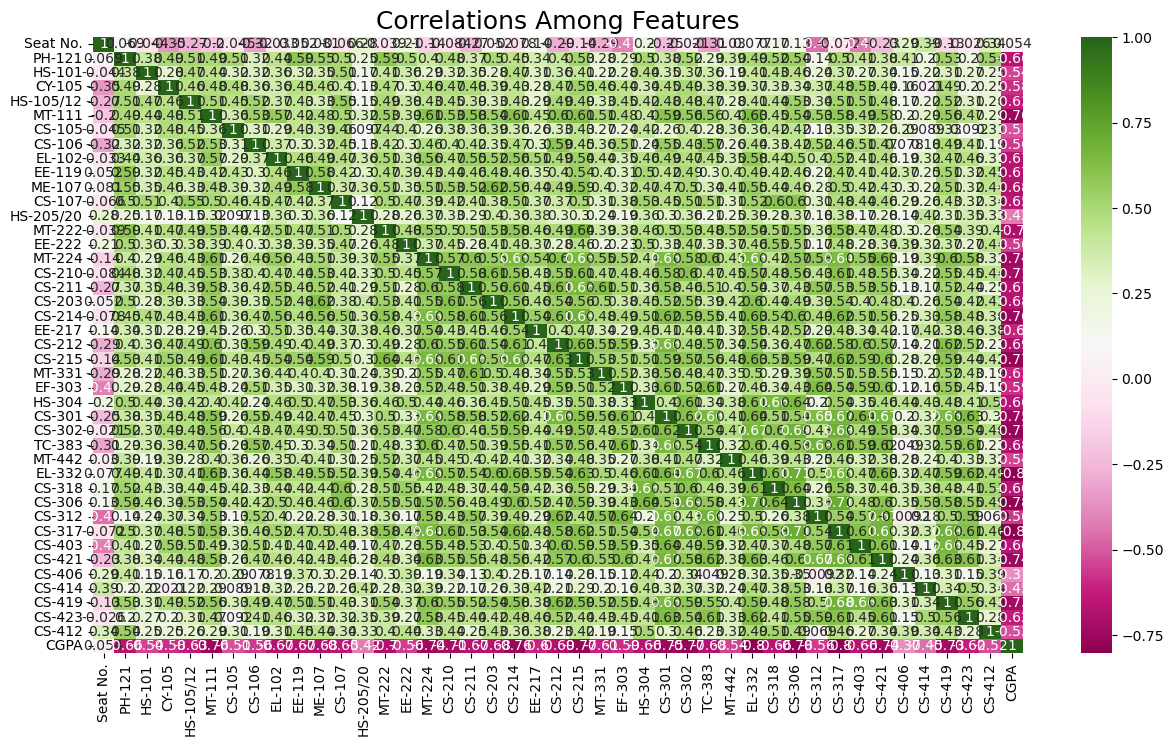

In [99]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

In [100]:
# Data Cleaning

# Dropping Seat No. since we do not require
df.drop(['Seat No.'], axis=1, inplace=True)     

df.shape

(571, 42)

In [101]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

# Separating feature and target

In [102]:
x=df.drop("CGPA", axis= 1)
y=df["CGPA"]

In [103]:
x.shape

(571, 41)

In [104]:
y.shape

(571,)

# checking variance inflation Factor(vif)

In [105]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,7.330790,PH-121
1,7.032961,HS-101
2,6.490315,CY-105
3,6.503618,HS-105/12
4,7.129686,MT-111
5,6.252548,CS-105
6,6.647898,CS-106
7,5.677736,EL-102
8,6.728827,EE-119
9,7.961351,ME-107


we observe by checking vif values the feature  causing multicollineraity problem. many have  vif 
is  more than 10 so  need to drop some feature. and there is multicollineraity problem 

In [106]:
# Dropping Seat No. since we do not require
df =df.drop(['CS-214','CS-212','CS-215','HS-304','CS-301','EL-332','CS-306','EL-332','CS-317','CS-306','CS-317','CS-421','CS-419'], axis=1)  

df.shape

(571, 32)

In [107]:
y.value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

# oversampling

In [108]:
x.columns = x.columns.astype(str)

In [109]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,2.000000,6,8,2.154435,9,8,5,8,...,6,8,8,8,8,1.259921,0.000000,8,3,1.259921
1,0,9,2.154435,9,5,1.817121,9,0,10,9,...,9,10,9,6,9,1.259921,1.709976,6,6,1.442250
2,0,3,0.000000,5,4,0.000000,5,4,2,2,...,2,3,3,0,6,0.000000,0.000000,0,2,0.000000
3,9,7,2.154435,9,9,1.259921,10,8,9,7,...,8,10,6,10,8,1.709976,1.442250,7,7,1.912931
4,2,2,1.259921,4,0,0.000000,2,4,0,2,...,2,5,4,4,5,1.259921,0.000000,2,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0.000000,2,1,0.000000,2,2,1,4,...,4,2,2,0,0,0.000000,1.587401,4,3,0.000000
567,1,0,0.000000,0,0,0.000000,0,2,0,0,...,2,4,4,0,0,1.259921,1.442250,2,6,1.259921
568,3,0,1.259921,4,0,0.000000,0,0,0,3,...,4,2,3,0,4,0.000000,1.817121,4,2,1.259921
569,0,4,2.080084,0,9,2.154435,5,8,5,8,...,4,9,3,3,8,2.080084,1.817121,3,5,1.817121


# Model Creation

Finding the best random state

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# creating train test split

In [111]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.9687871249055603 on random_state  75


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

# classification algorithms

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge


In [114]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_LR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score: 0.9687871249055603
R2_score on training Data: 94.24905035504693
Mean_Absolute_Error: 0.08376422964390438
Mean_Squared_Error: 0.011846744966851808
Root Mean Squared Error: 0.10884275339613478


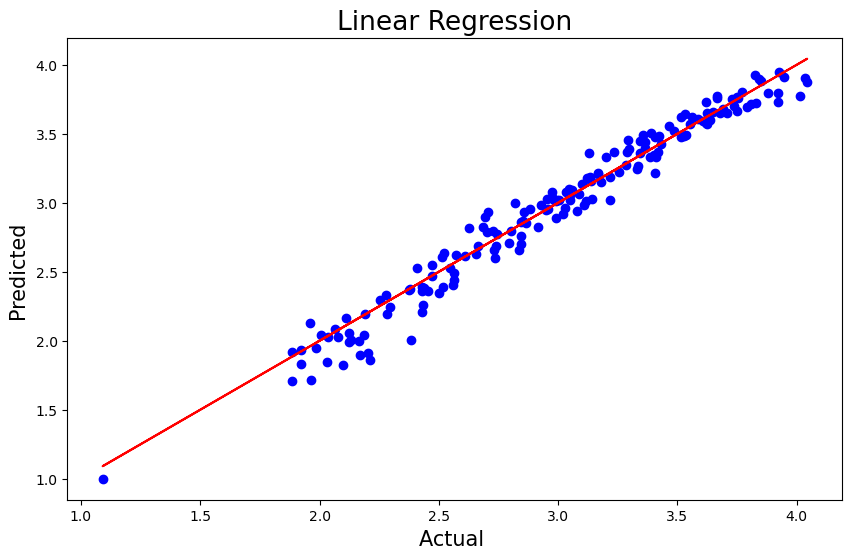

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='b')
plt.plot(pred_LR,pred_LR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [116]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_RFR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.965880244830502
R2_score on training Data: 99.12719472558385
Mean_Absolute_Error: 0.08737895348837198
Mean_Squared_Error: 0.012950041820930208
Root Mean Squared Error: 0.11379825051788015


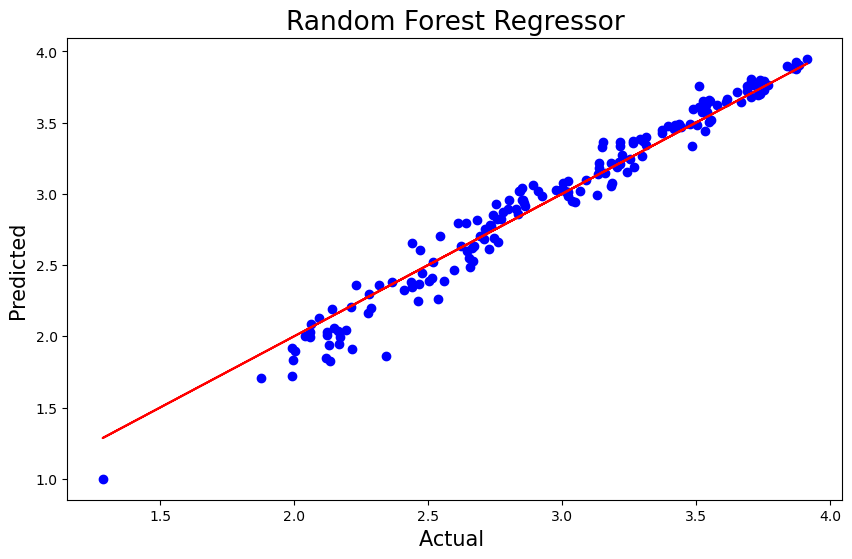

In [117]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_test,color='b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Random Forest Regressor",fontsize=19)
plt.show()

In [118]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_knn)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.9681797206913229
R2_score on training Data: 96.06062936680281
Mean_Absolute_Error: 0.08400000000000002
Mean_Squared_Error: 0.012077283255813956
Root Mean Squared Error: 0.10989669356178991


In [119]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR= GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_GBR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 0.9698453585967864
R2_score on training Data: 99.71550435046142
Mean_Absolute_Error: 0.08453969384926419
Mean_Squared_Error: 0.011445095819909863
Root Mean Squared Error: 0.10698175461222284


In [120]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso= lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_lasso)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: 0.4614940856398082
R2_score on training Data: 48.20852513919959
Mean_Absolute_Error: 0.37778074387858535
Mean_Squared_Error: 0.20438816389916545
Root Mean Squared Error: 0.4520930920719376


In [121]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd= rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.9688556338917297
R2_score on training Data: 94.24898768124447
Mean_Absolute_Error: 0.08364035779291934
Mean_Squared_Error: 0.011820742604537169
Root Mean Squared Error: 0.10872323856718567


In [122]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR= dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2_score: 0.8256173804312066
R2_score on training Data: 100.0
Mean_Absolute_Error: 0.19587790697674423
Mean_Squared_Error: 0.0661863546511628
Root Mean Squared Error: 0.25726708816162785


In [123]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR= svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_SVR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_SVR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_SVR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_SVR)))

R2_score: 0.9768261554799541
R2_score on training Data: 98.48384434787891
Mean_Absolute_Error: 0.06919463258706797
Mean_Squared_Error: 0.008795557125058482
Root Mean Squared Error: 0.09378463160378933


# Cross Validation Score

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.94578918 0.85260987 0.96195648 0.95577195 0.94294149]
0.931813797369975
Difference between R2 score and cross validation score is : 3.6973327535585243


In [126]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_RFR) - score.mean())*100)

[0.95784272 0.884301   0.9533335  0.94209227 0.93353329]
0.9342205562056238
Difference between R2 score and cross validation score is : 3.1659688624878224


In [127]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_knn) - score.mean())*100)

[0.96067019 0.86829105 0.95873944 0.94553012 0.93963654]
0.9345734694342965
Difference between R2 score and cross validation score is : 3.360625125702632


In [128]:
score = cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_GBR) - score.mean())*100)

[0.95792445 0.9219991  0.96515103 0.96056118 0.9527177 ]
0.9516706909332721
Difference between R2 score and cross validation score is : 1.8174667663514388


In [129]:
score = cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_lasso) - score.mean())*100)

[0.47161692 0.42701103 0.43019144 0.44694822 0.40854347]
0.43686221754175875
Difference between R2 score and cross validation score is : 2.463186809804946


In [130]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rd) - score.mean())*100)

[0.94578785 0.85252737 0.96204792 0.95580723 0.94297523]
0.9318291219055794
Difference between R2 score and cross validation score is : 3.7026511986150257


In [131]:
score = cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_DTR) - score.mean())*100)

[0.82240216 0.84519127 0.90225291 0.80492899 0.74927434]
0.8248099325069399
Difference between R2 score and cross validation score is : 0.08074479242666799


In [132]:
score = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_SVR) - score.mean())*100)

[0.96363789 0.93340016 0.96468609 0.97332337 0.9508183 ]
0.9571731609991943
Difference between R2 score and cross validation score is : 1.9652994480759856


Support Vector Regression (SVR) is our best model as the difference between R2 score and cross validation
score is : 1.6564398470848896 and this is least out of all

finaly we observe that Support Vector Regression (SVR) is our best model

# Hyper Parameter Tuning

In [133]:
# Linear Regression
from sklearn.model_selection import GridSearchCV



In [134]:
parameters={'kernel':['linear', 'poly','rbf'],
            'max_iter':[1,2,3,-1],
            'degree':[0,1,2,3],
            'shrinking':[True],                   
            'epsilon':[0.1,0.2,0.3,0.4,0.5]
            }

In [135]:
GCV=GridSearchCV(SVR(),parameters, cv =5)

In [136]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [0, 1, 2, 3],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'max_iter': [1, 2, 3, -1], 'shrinking': [True]})

In [137]:
GCV.best_params_

{'degree': 0,
 'epsilon': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True}

In [138]:
Final_model = SVR(degree= 0,epsilon= 0.1,kernel ='rbf',max_iter=-1,shrinking= True)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.9768261554799541
Mean_Absolute_Error: 0.06919463258706797
Mean_Squared_Error: 0.008795557125058482
Root Mean Squared Error: 0.09378463160378933


# Saving the model

In [139]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Student_Grades_Prediction_Project_Analysis.pkl")

['Student_Grades_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [140]:
# first we load the saved model and get prediction
model = joblib.load("Student_Grades_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([3.53458046, 2.58702279, 2.05332734, 3.37561615, 3.02450612,
       2.66814726, 2.83908488, 2.02078113, 2.46918064, 3.82061898,
       2.17835485, 2.71097902, 2.63538833, 2.84273344, 2.94173493,
       2.73819739, 2.89860748, 3.3438824 , 2.8644552 , 3.66185048,
       3.09324656, 3.70525599, 3.30074689, 2.78573382, 2.80529974,
       3.21244859, 2.98460515, 3.72075601, 2.29985261, 2.25233115,
       2.21159872, 3.68008448, 2.95293988, 2.65266098, 2.42246252,
       2.0181912 , 2.28188058, 2.24882992, 3.066315  , 3.1037488 ,
       1.98576285, 3.13246664, 2.69731541, 2.15599361, 2.91175882,
       2.59105951, 3.05576839, 3.78214046, 3.63240769, 3.31424416,
       3.64101886, 1.99086293, 2.94063528, 3.24268148, 2.88973246,
       3.70542114, 2.93818353, 2.8440787 , 3.20994749, 2.0822775 ,
       3.719357  , 2.98357687, 3.8558837 , 3.33376701, 3.63375293,
       3.3956454 , 2.86856097, 2.29078716, 3.28732171, 2.75220849,
       3.56591477, 2.33444179, 3.2085638 , 3.67790985, 3.57650

# these are the prediction for grade of student

In [141]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,3.534580,3.572
1,2.587023,2.683
2,2.053327,2.042
3,3.375616,3.458
4,3.024506,3.058
...,...,...
167,3.489536,3.476
168,2.708307,2.793
169,2.250133,2.008
170,3.390709,3.346
